## Practice with Pandas

Read in the salaries.csv data and answer the questions below.


In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('Salaries.csv')


1.  How many entries are there?


2.  What variables have missing values?  How many missing values?  Are there any columns that have only missing values?



3.  What is the average base pay?



4.  What is the highest amount of overtime pay in the dataset?


5.  What is the job title of JOSEPH DRISCOLL? (Use all caps)



6.  What is the name, job title and total pay of the highest paid person (including benefits)?



7.  What is the name, job title and total pay of the lowest paid person (icluding benefits)?  Do you notice anything strange?



8.  What is the average base pay of all employees per year?



9.  How many unique job titles are there?



10.  What are the top 5 most common jobs?



11. Find the correlation between salary (including benefits) and the length of the Job Title string.  Do you see anything interesting?



12. Make a histogram of Total pay (with benefits)



13. Make a density estimation plot of total pay with benefits.



14. Make side-by-side boxplots of base pay and benefits



15. Make a scatterplot of base pay and benefits

## Solutions

In [ ]:
#1.  How many entries are there?
#2.  What variables have missing values?  How many missing values?  
#Are there any columns that have only missing values?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [4]:
#148,654 cases
# BasePay, Benefits, Notes and Status are missing values
# Notes and Status are only missing values
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [5]:
# 3. Average base pay
df['BasePay'].mean()

66325.4488404877

In [6]:
# 4. Highest amount of overtime
df['OvertimePay'].max()

245131.88

In [7]:
# 5. What is the job title of JOSEPH DRISCOLL? 
df[df['EmployeeName']=='JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [8]:
# 6. highest paid person
df[df['TotalPayBenefits']==df['TotalPayBenefits'].max()][['EmployeeName','JobTitle','TotalPayBenefits']]

EmployeeName                                        JobTitle  \
0  NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   

   TotalPayBenefits  
0         567595.43

In [9]:
#7.  What is the name of the lowest paid person (including benefits)?  
#Do you notice anything strange?

df[df['TotalPayBenefits']==df['TotalPayBenefits'].min()][['EmployeeName','JobTitle','TotalPayBenefits']]

# total pay is negative!

EmployeeName                    JobTitle  TotalPayBenefits
148653    Joe Lopez  Counselor, Log Cabin Ranch           -618.13

In [12]:
#8.  What is the average base pay of all employees per year?
df.groupby('Year')['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

In [13]:
#9.  How many unique job titles are there?
df['JobTitle'].nunique()

2159

In [18]:
#10.  What are the top 5 most common jobs?
df['JobTitle'].value_counts().sort_values(ascending=False).head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

In [23]:
#11. Find the correlation between salary (including benefits) 
#and the length of the Job Title string.  
#Do you see anything interesting?

df['JobTitleLength'] = df['JobTitle'].apply(len)
print(df['JobTitleLength'].corr(df['TotalPayBenefits']))

#nothing interesting.  There is basically no correlation (as expected)

-0.03687844593260671

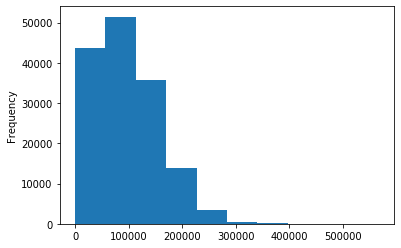

In [ ]:
# 12. Make a histograme of Total pay (with benefits)
df['TotalPayBenefits'].plot.hist()

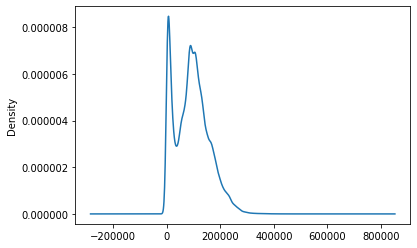

In [ ]:
# 13. density estimation plot
df['TotalPayBenefits'].plot.kde()

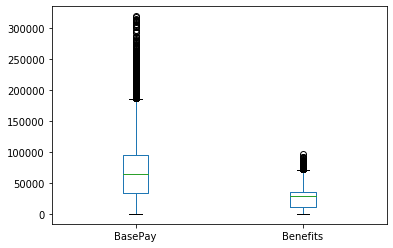

In [ ]:
# 14. side-by-side boxplots of base pay and benefits
df[['BasePay','Benefits']].plot.box()

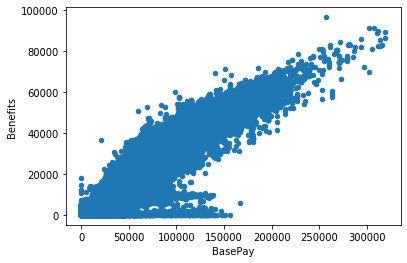

In [ ]:
# 15. make a scatterplot of base pay and benefits
df.plot.scatter('BasePay','Benefits')